In [1]:
%matplotlib inline  

import pandas as pd
import matplotlib.pylab as plot

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
len(titanic)

1309

In [4]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
titanic['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [6]:
titanic['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

Show survival rate from `titanic['survived']`

In [7]:
titanic['survived'].value_counts(normalize=True) * 100

0    61.802903
1    38.197097
Name: survived, dtype: float64

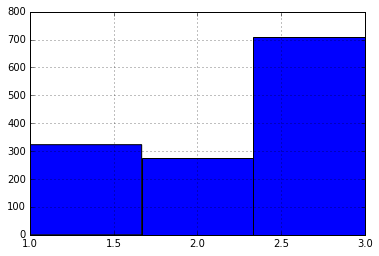

In [8]:
titanic['pclass'].hist(bins=3)

In [9]:
pd.crosstab( titanic.pclass, titanic.survived )

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


In [10]:
titanic.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [11]:
titanic.dropna(how='any')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [12]:
subset = titanic[['pclass','survived','sex','age']].dropna()
subset.shape, titanic.shape

((1046, 4), (1309, 14))

In [13]:
def male_female_child(passenger):    
    age, sex = passenger    
    if age < 16:
        return 'child'
    else:
        return sex
subset['person'] = titanic[['age', 'sex']].apply(male_female_child, axis=1)
subset['person'].value_counts()

male      599
female    332
child     115
Name: person, dtype: int64

In [14]:
pd.crosstab(subset.person, subset.survived)

survived,0,1
person,,
child,49,66
female,77,255
male,493,106
